In [2]:
import pandas as pd


In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

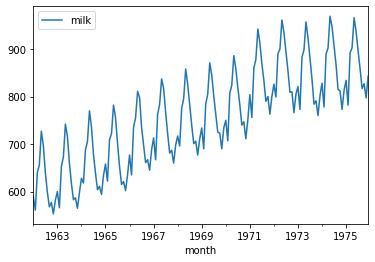

In [4]:
milk.plot()

In [5]:
import statsmodels.api as sm

In [6]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [7]:
days=pd.Series(milk.index.days_in_month.values, index= milk.index)

In [8]:
new=pd.DataFrame(milk)

In [9]:
milk['d']=days

In [10]:
milk['av']=milk.milk/milk.d

In [11]:
milk.av.sum()

4166.326661899466

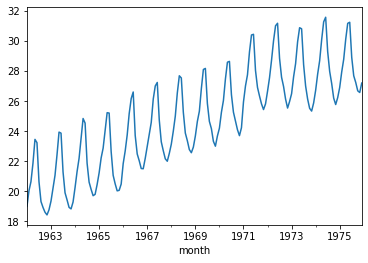

In [12]:
milk.av.plot()

In [42]:
sm.tsa.stattools.adfuller(milk.av.diff(12).dropna().diff(1).dropna())

(-5.481326334796932,
 2.2808455518036712e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

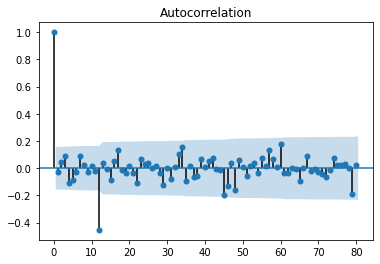

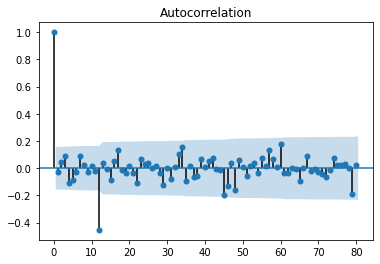

In [40]:
sm.graphics.tsa.plot_acf(milk.av.diff(12).diff(1).dropna().values.squeeze(), lags=80)

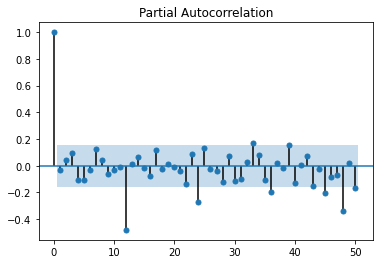

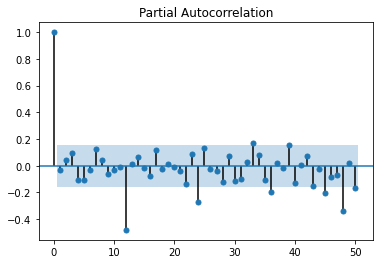

In [43]:
sm.graphics.tsa.plot_pacf(milk.av.diff(12).diff(1).dropna().values.squeeze(), lags=50)

In [28]:
milk.av.diff(13).dropna()

month
1963-02-01    1.214286
1963-03-01    1.028802
1963-04-01    1.788172
1963-05-01    2.068817
1963-06-01    0.415054
                ...   
1975-08-01   -1.612903
1975-09-01   -0.734409
1975-10-01   -0.489247
1975-11-01    0.373118
1975-12-01    1.426882
Name: av, Length: 155, dtype: float64